# Betting simulations

Jaakko Wallenius

References:
   * *The Kelly Criterion and the Stock Market* (1992). Louis M. Rotando \& Edward O. Thorp. The American Mathematical Monthly.
   * *Python for Finance* (2019). Yves Hilpisch. O’Reilly Media.

Simple binomial game. $p$ = probability of us winning the round. $q=1-p$ = probability of us losing the round.

Rounds:

$R_k=\begin{cases} 1, & \mbox{if the round results us winning} \\ -1, & \mbox{if the round results us losing} \end{cases}$

Recursive evolution of the game ($X_k$ = Capital at the end of round $k$):

$X_k=X_{k-1}+R_kB_k, \quad k=1,2,3,...$

Accumulated capital for $n$ rounds:

$X_n=X_0+\sum_{k=1}^nR_kB_k$

In [7]:
import numpy as np
from pylab import plt

### Settings

Let $p=0.55$, $X_0=1$ and we play 100 rounds of the game ($N=100$). Run 50 simulations of each strategy ($S=50)$.

In [60]:
p = 0.55
N = 100
S = 50

### Betting according to Kelly Criterion

Betting a fraction $f$ of capital: $B_k=fX_{k-1}$. Maximize:

$G(f)=\mathbb{E}\bigg\{log\bigg(\frac{X_k}{X_0}\bigg)^{1/n}\bigg\}$

Find optiomal $f$:

$f^*=p-q$

In [61]:
def run_kelly(X_0,p,rounds,runs):
    f = p-(1-p)
    c = np.zeros((rounds,runs))
    c[0] = X_0
    for i in range(runs):
        for t in range(1,rounds):
            w = np.random.binomial(1,p)
            if w > 0: c[t,i] = (1+f)*c[t-1,i]
            else: c[t,i] = (1-f)*c[t-1,i]
    return c

In [62]:
kelly_sim_1 = run_kelly(1,p,N,S)

Text(0.5, 1.0, 'Kelly Criterion')

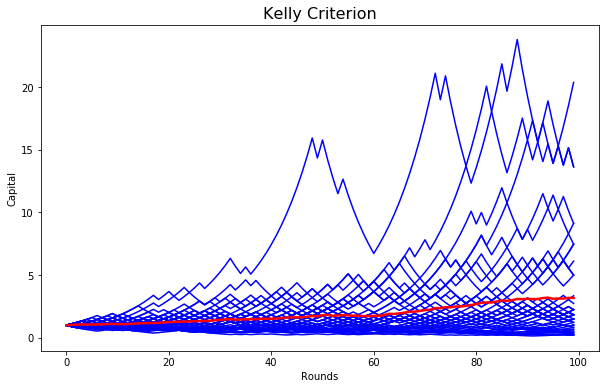

In [63]:
plt.figure(figsize=(10,6))
plt.plot(kelly_sim_1,'b')
plt.plot(kelly_sim_1.mean(axis=1), 'r', lw=2.5)
plt.xlabel('Rounds')
plt.ylabel('Capital')
plt.title('Kelly Criterion',fontsize=16)

Red line is the **average** run. None of the runs ends up in a ruin.

### Betting random fraction of capital in each round

In [64]:
def run_rand_bets(X_0,p,rounds,runs):
    c = np.zeros((rounds,runs))
    c[0] = X_0
    for i in range(runs):
        for t in range(1,rounds):
            w = np.random.binomial(1,p)
            f = np.random.uniform(0,1)
            if w > 0: c[t,i] = (1+f)*c[t-1,i]
            else: c[t,i] = (1-f)*c[t-1,i]
    return c

In [65]:
random_bets_sim = run_rand_bets(1,p,N,S)

Text(0.5, 1.0, 'Random fraction')

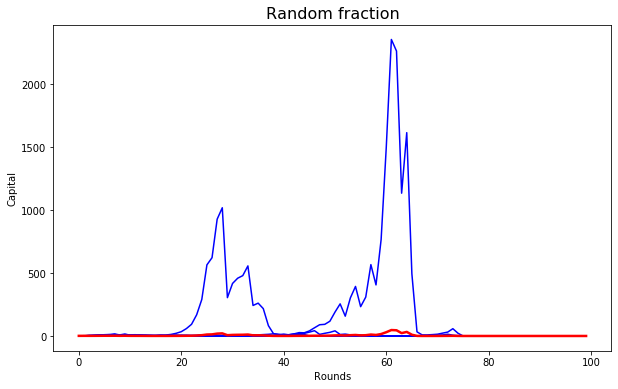

In [66]:
plt.figure(figsize=(10,6))
plt.plot(random_bets_sim,'b')
plt.plot(random_bets_sim.mean(axis=1), 'r', lw=2.5)
plt.xlabel('Rounds')
plt.ylabel('Capital')
plt.title('Random fraction',fontsize=16)

All of the runs end up in (near) ruin eventually.

### Betting fixed fraction of capital $f=0.5$

In [67]:
fixed = 0.5

In [69]:
def run_fixed_bets(X_0,p,f,rounds,runs):
    c = np.zeros((rounds,runs))
    c[0] = X_0
    for i in range(runs):
        for t in range(1,rounds):
            w = np.random.binomial(1,p)
            if w > 0: c[t,i] = (1+f)*c[t-1,i]
            else: c[t,i] = (1-f)*c[t-1,i]
    return c

In [70]:
fixed_bets_sim = run_fixed_bets(1,p,fixed,N,S)

Text(0.5, 1.0, 'Fixed fraction (f=0.5)')

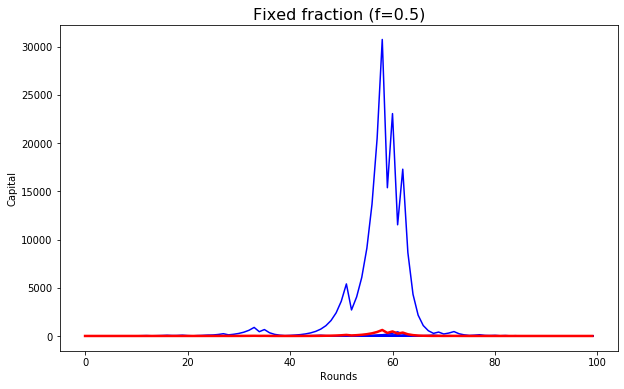

In [71]:
plt.figure(figsize=(10,6))
plt.plot(fixed_bets_sim,'b')
plt.plot(fixed_bets_sim.mean(axis=1), 'r', lw=2.5)
plt.xlabel('Rounds')
plt.ylabel('Capital')
plt.title('Fixed fraction (f=0.5)',fontsize=16)

Some of the runs are "good", some of them end up (near) ruin, but on average no capital is gained.

### Betting all-in each round

In [72]:
def run_allin_bets(X_0,p,rounds,runs):
    c = np.zeros((rounds,runs))
    c[0] = X_0
    for i in range(runs):
        for t in range(1,rounds):
            w = np.random.binomial(1,p)
            if w > 0: c[t,i] = 2*c[t-1,i]
            else: break
    return c

In [73]:
allin_bets = run_allin_bets(1,p,N,S)

Text(0.5, 1.0, 'All-in')

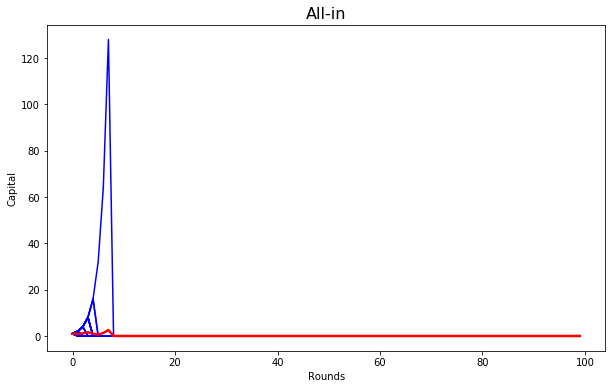

In [74]:
plt.figure(figsize=(10,6))
plt.plot(allin_bets_sim,'b')
plt.plot(allin_bets_sim.mean(axis=1), 'r', lw=2.5)
plt.xlabel('Rounds')
plt.ylabel('Capital')
plt.title('All-in',fontsize=16)

All of the runs end up in (near) ruin eventually.

## Plot

Text(0.5, 1.0, 'All-in')

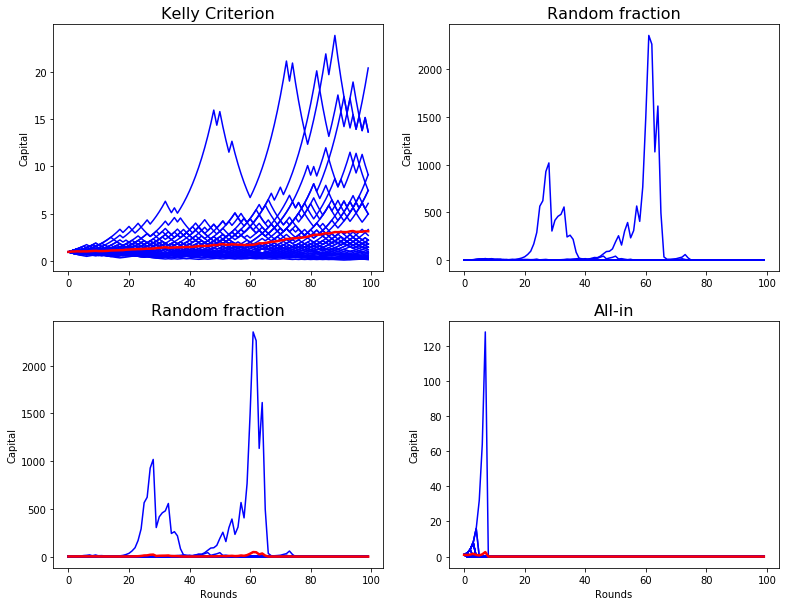

In [81]:
plt.figure(figsize=(13,10))

plt.subplot(221)
plt.plot(kelly_sim_1,'b')
plt.plot(kelly_sim_1.mean(axis=1), 'r', lw=2.5)
plt.ylabel('Capital')
plt.title('Kelly Criterion',fontsize=16)

plt.subplot(222)
plt.plot(random_bets_sim,'b')
plt.ylabel('Capital')
plt.title('Random fraction',fontsize=16)

plt.subplot(223)
plt.plot(random_bets_sim,'b')
plt.plot(random_bets_sim.mean(axis=1), 'r', lw=2.5)
plt.xlabel('Rounds')
plt.ylabel('Capital')
plt.title('Random fraction',fontsize=16)

plt.subplot(224)
plt.plot(allin_bets_sim,'b')
plt.plot(allin_bets_sim.mean(axis=1), 'r', lw=2.5)
plt.xlabel('Rounds')
plt.ylabel('Capital')
plt.title('All-in',fontsize=16)